<a href="https://colab.research.google.com/github/popcornjose/hello-world/blob/master/%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92N5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## １次元入力の直線モデル

例：年齢ｘと身長ｔのセットのデータ１６人分を考える。

$$
  x = \left[
    \begin{array}{c}
      x_0  \\
      x_1 \\
      \vdots \\
      x_n \\
      \vdots \\
      x_{N-1} \\
    \end{array}
  \right]
  \hspace{15pt}
  t = \left[
    \begin{array}{c}
      t_0  \\
      t_1 \\
      \vdots \\
      t_n \\
      \vdots \\
      t_{N-1} \\
    \end{array}
  \right]　　　　　　　　ーーーーーーー①
$$

通常１からNの数字をデータに当てはめるが,Pythonの配列変数にあわせてN個のデータに
０からN-1までの数字を割り振る。

この時、$x_nを[入力変数],t_nを[目標変数]$（ターゲット）と呼ぶ。

また、ｘを入力データ、ｔを目的データとよぶものとする。

目的は、データベースにない人の年齢ｘに対してその人の身長ｔを予測することです。

先ずPythonによるサンプルデータの作成

In [0]:
# リスト５−１−(1)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(seed=1)   # 乱数固定
X_min = 4                # ｘの下限（表示用）
X_max = 30               # ｘの上限（表示用）
X_n = 16                 # データの個数
X = 5 + 25 * np.random.rand(X_n)
Prm_c = [170, 108, 0.2]  # 生成パラメータ
T = Prm_c[0] - Prm_c[1] * np.exp(-Prm_c[2] * X) + 4 * np.random.randn(X_n)     # (A)変数ｘによるTの値
                                                                               # T=170-108*exp(108*X)+4*x
np.savez('ch5_data.npz', X=X, X_min=X_min, X_max=X_max, X_n=X_n, T=T)          # (B)　データ保存

In [5]:
# リスト５−１−(2)

print(X)

[15.42555012 23.00811234  5.00285937 12.55831432  8.66889727  7.30846487
  9.65650528 13.63901818 14.91918686 18.47041835 15.47986286 22.13048751
 10.11130624 26.95293591  5.68468983 21.76168775]


In [2]:
# リスト５−１−(3)

print(np.round(X,2))     # Xの値を見る

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]


In [3]:
# リスト　５−１−(4)

print(np.round(T,2))     # Tの値を見る

[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


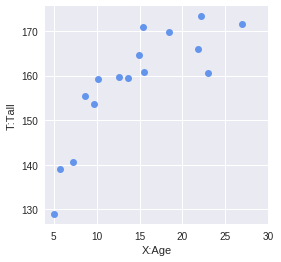

In [15]:
# リスト　５−１−(5)

# データのグラフ表示

plt.figure(figsize=(4,4))
plt.plot(X, T, marker='o', linestyle='None', markeredgecolor='black', color='cornflowerblue')

plt.xlim(X_min, X_max)
plt.grid(True)
plt.xlabel('X:Age')
plt.ylabel('T:Tall')
plt.show()

リスト５−１−(1)で１６人分の年齢Xをランダムに決定し、（A)によってXからTを決定している。

（B）では生成したデータを'ch5_data.npz'に保存している。次のリストによりそのデータを読み取る。

In [6]:
# リスト　５−１−(3)

print(np.round(X,2))

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]


In [7]:
# リスト　５−１−(4)

print(np.round(T,2))     # 身長Tを表示

[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


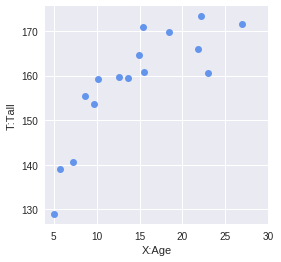

In [8]:
# リスト　５−１−(5)

# XとTのデータグラフの表示

plt.figure(figsize=(4,4))
plt.plot(X, T, marker='o', linestyle='None',
        markeredgecolor='black', color='cornflowerblue')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.xlabel('X:Age')
plt.ylabel('T:Tall')
plt.show()

## 直線モデル

データにバラつきがあるが、この与えられたデータ上に直線を引くことであらゆるｘに対してそれらしいｔを予測をするこができる。

この直線式は、
$$
y(x)=w_0x+w_1　　　　　  ーーーーー②
$$

傾きを表す$w_0と切片を表すw_1$に適当な値を入れれば、様々な位置や傾きの直線が作れる。

$y(x)$はｘに対するｔの予測値とみなすことができ、この式を直線モデルと呼ぶ。

この直線がデータに合うようにするには、$w_0とw_1$をどのようにきめればよいか。

## 二乗誤差関数

データに似合う目安として、次の式、誤差Jを定義する。

ここでは、平均二乗誤差(Mean Squire Error:MSE)、直線とデータ点の差の二乗の平均を利用する。

$$
J=\frac{1}{N}\sum_{n=0}^{N-1}(y_n-t_n)^2     ----------③
$$

ここで、$y_nは直線モデルにx_n$を入れた時の出力を表す。
$$
y_n=y(x_n)=w_0x_n+w_1　　　　　　　ーーーーーーーーー④
$$

$w_0とw_1$を決めると、それに対する平均二乗誤差Jを計算することができるが、データが直線上にならんでいないので、Jが完全に０になることはない。

このw と J の関係をグラフに表してみる。

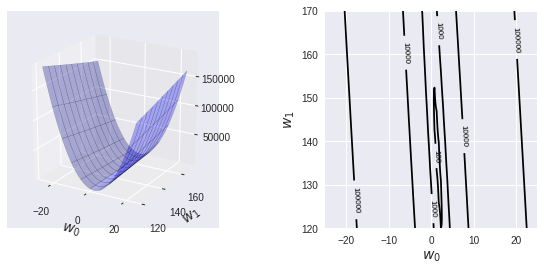

In [9]:
# リスト５−１−(5)

from mpl_toolkits.mplot3d import Axes3D

# 平均誤差関数ーーーーーーーーーーーー

def mse_line(x,t, w):
    y = w[0] * x + w[1]
    mse = np.mean((y - t)**2)
    return mse

# 計算ーーーーーーーーーーーーーーーーー
xn = 100      # 等高線表示の解像度
w0_range = [-25, 25]
w1_range = [120, 170]
x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
J = np.zeros((len(x0), len(x1)))
for i0 in range(xn):
    for i1 in range(xn):
        J[i1, i0] = mse_line(X, T, (x0[i0], x1[i1]))
        
# 表示　ーーーーーーーーーーーーーーーーー
plt.figure(figsize=(9.5, 4))
plt.subplots_adjust(wspace=0.5)

ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(xx0, xx1, J, rstride=10, cstride=10, alpha=0.3,
               color='blue', edgecolor='black')
ax.set_xticks([-20, 0, 20])
ax.set_yticks([120, 140, 160])
ax.set_xlabel('$w_0$', fontsize=14)
ax.set_ylabel('$w_1$', fontsize=14)
ax.view_init(20, -60)

plt.subplot(1, 2, 2)
cont = plt.contour(xx0, xx1, J, 30, colors='black',
                  levels=[100, 1000, 10000, 100000])
cont.clabel(fmt='%1.0f', fontsize=8)
plt.xlabel('$w_0$', fontsize=14)
plt.ylabel('$w_1$', fontsize=14)
plt.grid(True)
plt.show()

Jが最小値をとるのは、３ｄグラフでは分かりにくいが、右の等高線表示では$w_0が３，w_1$では135あたりで最小となりそうである。


## パラメータを求める（勾配法）

Jが最も小さくなる$w_0とw_1$を求める最も基本的な方法は、

#### 勾配法（最急降下法、steepest descent method）

である。

ある地点$(w_0,w_1)$に立って、周りの坂の上の方向は、Jを$w_0とw_1$で偏微分したベクトル
$$
\left[
\frac {\partial{J}}{\partial{w_0}} \frac{\partial{J}} {\partial{w_1}}
\right]^T
$$

で表される。これをＪの勾配（グラディエント$\mathrm{grad}$）と呼び$\nabla wJ$と表す。

```$\mathrm{grad}$   $\nabla wJ$``` 

Ｊを最小にするには、Ｊの勾配の反対方向、
$$-\nabla wJ=\left[
\frac {\partial{J}}{\partial{w_0}} \frac{\partial{J}} {\partial{w_1}}
\right]^T
$$

に進んでいけばよい。w の更新方法（学習則）を行列表記で表すと、

$$
w(t+1)=w(t)-a\nabla wJ\mid_{w(t)}           ーーーーーーーーー⑤
$$

```w(t+1)=w(t)-a\nabla wJ\mid w(t)```

$\nabla wJ$はｗの関数になり、このｗに現在のｗの値w(t)を代入した値を$\nabla wJ\mid w(t)$と表す。

このベクトルが、今いる地点 w(t) での勾配を表すことになる。a,は、学習率と呼ばれる正の値をとるパラメータで、w の更新の幅を調整する。

$
\begin
学習率とは、機械学習の最適化においてどのくらい値を動かすかというパラメーター。
学習率を大きくしすぎると発散し、小さくしすぎると収束まで遅くなる。
$

学習率を成分表記で表すと、次のようになる。

$$
w_0(t+1)=w_0(t) - \alpha \frac{\partial J}{\partial w_0}\mid_{w_0(t),w_1(t)}       ーーーーー⑥
$$

$$
w_1(t+1)=w_1(t) - \alpha \frac{\partial J}{\partial w_1}\mid_{w_0(t),w_1(t)}       ーーーーー⑦
$$

具体的にこの偏微分を計算してみる。③式の$y_n$の部分を直線の式④で置き換えると、次のようになる。

$$
J = \frac{1}{N}\sum_{n=0}^{N-1}(y_n-t_n)^2 = \frac{1}{N}\sum_{n=0}^{N-1}(w_0x_n+w_1-t_n)^2　ーーーー⑧
$$

式⑥の$w_0$に関する偏微分の部分を連鎖律で計算すると、

$$
\frac{\partial J}{\partial w_0}=\frac{2}{N}\sum_{n=0}^{N-1}(w_0x_n+w_1-t_n)x_n=\frac{2}{N}\sum_{n=0}^{N-1}(y_n-t_n)x_n　　　ーーーー⑨
$$

（$w_0w_n+w_1をy_n$に戻している）同様にして、式③を$w_1$で偏微分すると、

$$
\frac{\partial J}{\partial w_1}=\frac{2}{N}\sum_{n=0}^{N-1}(w_0x_n+w_1-t_n)=\frac{2}{N}\sum_{n=0}^{N-1}(y_n-t_n)　　　　ーーーーー⑩
$$

よって、式⑥、⑦の学習則は式⑪、⑫のようになる。

$$
w_0(t+1)=w_0(t)-\alpha \frac{2}{N}\sum_{n=0}^{N-1}(y_n-t_n)x_n　　　　　　ーーーーーー⑪
$$

$$
w_1(t+1)=w_1(t)-\alpha \frac{2}{N}\sum_{n=0}^{N-1}(y_n-t_n)　　　　　　　ーーーーーー⑫
$$

リスト　５−１−(7)で勾配を計算する関数 dmse_line(x, t, w)を作成し、引数にデータ x, t とパラメータ w を渡すと
w における勾配 d_w0, d_w1 を返す。

In [0]:
# リスト　５−１−(7)

# 平均二乗誤差の勾配

def dmse_line(x, t, w):
    y = w[0] * x + w[1]
    d_w0 = 2 * np.mean((y-t)*x)
    d_w1 = 2 * np.mean(y-t)
    return d_w0, d_w1

In [11]:
# リスト　５−１−(8)

d_w = dmse_line(X, T, [10, 165])
print(np.round(d_w, 1))

[5046.3  301.8]


次のリスト５−１−(9)で、このdmse_lineを使った勾配法 fit_line_num(x,t) を実装し、データx,t を引数にして、mse_lineを最小にするw を返す。
w の初期値 w_init=[10.0, 165.0]からスタートさせる。この更新ステップの幅である学習率は alpha = 0.001とする。


繰り返し回数13820
W=[1.539947, 136.176160]
dMSE=[-0.005794,0.099991]
MSE=49.027452


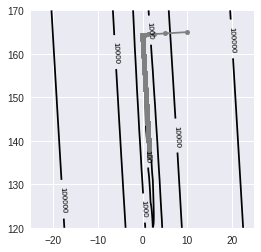

In [12]:
# リスト　５−１−(9)

# 勾配法

def fit_line_num(x, t):
    w_init = [10.0, 165.0]       # 初期パラメータ
    alpha = 0.001         # 学習率
    i_max = 100000        # 繰り返しの最大数
    eps = 0.1             # 繰り返しをやめる勾配の絶対値の閾値
    w_i=np.zeros([i_max, 2])
    w_i[0, :]= w_init
    for i in range(1, i_max):
        dmse = dmse_line(x, t, w_i[i - 1])
        w_i[i, 0] = w_i[i -1, 0] - alpha * dmse[0]
        w_i[i, 1] = w_i[i -1, 1] - alpha * dmse[1]
        if max(np.absolute(dmse)) < eps: # 終了判定、np.absolute は絶対値
            break
    w0 = w_i[i, 0]
    w1 = w_i[i, 1]
    w_i = w_i[:i, :]
    return w0, w1, dmse, w_i

# メイン　ーーーーーーーーーーーーーーーーーーーーーーーーー
plt.figure(figsize=(4, 4))

# MSEの等高線表示

xn = 100     # 等高線解像度
w0_range = [-25, 25]
w1_range = [120,170]
x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
J = np.zeros((len(x0), len(x1)))
for i0 in range(xn):
    for i1 in range(xn):
        J[i1, i0]= mse_line(X, T, (x0[i0],x1[i1]))
        
cont = plt.contour(xx0, xx1, J, 30, colors='black',
                  levels=(100, 1000, 10000, 100000))
cont.clabel(fmt='%1.0f', fontsize=8)
plt.grid(True)

# 勾配法呼び出し
W0, W1, dMSE, W_history = fit_line_num(X, T)

# 結果表示
print('繰り返し回数{0}'.format(W_history.shape[0]))
print('W=[{0:.6f}, {1:.6f}]'.format(W0, W1))
print('dMSE=[{0:.6f},{1:.6f}]'.format(dMSE[0],dMSE[1]))
print('MSE={0:.6f}'.format(mse_line(X, T, [W0, W1])))
plt.plot(W_history[:, 0], W_history[:, 1], '.-',
        color='gray',markersize=10, markeredgecolor='cornflowerblue')
plt.show()

w0=1.540, w1=136.176
SD=7.002 cm


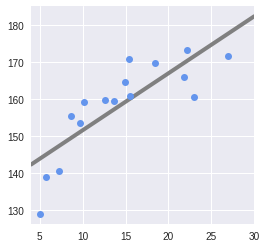

In [13]:
# リスト　５−１−(10)

# 線の表示
def show_line(w):
    xb = np.linspace(X_min, X_max, 100)
    y = w[0] * xb + w[1]
    plt.plot(xb, y, color=(.5, .5, .5), linewidth=4)
    
# メイン  --------------------

plt.figure(figsize=(4, 4))
W = np.array([W0, W1])
mse = mse_line(X, T, W)
print("w0={0:.3f}, w1={1:.3f}" .format(W0, W1))
print("SD={0:.3f} cm".format(np.sqrt(mse)))
show_line(W)
plt.plot(X, T, marker='o', linestyle='None',
        color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

リスト５−１−(4)による平均二乗誤差（MSE)は49.03$cm^2$であったが、これは文字道り誤差を二乗しているので、平方根$\sqrt{49.03}$
をとると、7.002$cm^2$となる。

この平均二乗誤差の平方根を$\mathbf{標準偏差(standard deviation, SD)}$と呼ぶ。

リスト５−１−(10)でも、SD=7.002cmとなっている。

誤差が正規分布に従っていると仮定したとき、全体の６８％のデータ点で誤差が7.00cm以下となる。正規分布の場合、平均からのズレがプラスマイナスSDの範囲に、分布の６８％が入るからである。
このように、Jの勾配さえ求めることができれば、最小二乗法で極小値を求めることができる。

## 直線モデルパラメータの解析解

勾配法は繰り返しの計算によって近似的な値を求める計算法であり、このような解を$\mathbf{数値解}$と呼ぶ。これに対して方程式を解くことによって厳密な解を求める解を$\mathbf{解析解}$と呼ぶ。

Jが極小となる地点ｗを探すことは、その地点での傾きが０である地点なので、$\partial J/\partial w_0=0 と \partial J/\partial w_1=0 を満たすw_0とw_1$を見つければ良いことになる。よって、式⑨、⑩を＝０とおいた式から出発する。

$$
\frac{\partial J}{\partial w_0}=\frac{2}{N}\sum_{n=0}^{N-1}(w_0x_n+w_1-t_n)x_n=0         -----------⑬
$$

$$
\frac{\partial J}{\partial w_1}=\frac{2}{N}\sum_{n=0}^{N-1}(w_0x_n+w_1-t_n)=0             -----------⑭
$$

式⑬で、両辺を２で割ると

$$
\frac{1}{N}\sum_{n=0}^{N-1}(w_0x_n+w_1-t_n)x_n=0      ----------⑮
$$

式⑮の和の記号を各項に展開すると

$$
\frac{1}{N}\sum_{n=0}^{N-1}w_0x_n^2+\frac{1}{N}\sum_{n=0}^{N-1}w_1x_n-\frac{1}{N}\sum_{n=0}^{M-1}t_nx_n=0   ------⑯
$$

第一項の$w_0及び第二項のw_1$はｎに関係ない定数なので和の記号の外に出して

$$
w_0\frac{1}{N}\sum_{n=0}^{N-1}x_n^2+w_1\frac{1}{N}\sum_{n=0}^{N-1}x_n-\frac{1}{N}\sum_{n=0}^{N-1}t_nx_n=0----------⑰
$$

第一項の$\frac{1}{N}\sum_{n=0}^{N-1}x_n^2$は、入力データｘの二乗の平均を表し、

第二項の$\frac{1}{N}\sum_{n=0}^{N-1}x_n$は、入力データの平均、そして

第三項の$\frac{1}{N}\sum_{n=0}^{N-1}t_nx_n$は、目標データと入力データの積の平均を表している。

そこで、これらを以下のように表すことにする。

$$
<x^2>=\frac{1}{N}\sum_{n=0}^{N-1}x_n^2 ,~~~~ <x>=\frac{1}{N}\sum_{n=0}^{N-1}x_n, ~~~~ <t_x>=\frac{1}{N}\sum_{n=0}^{N-1}t_nx_n
$$

一般的に、$<f(x)>でf(x)$の平均を表す。すると、式⑯は以下のようになる。

$$
w_0<x^2>+w_1<x>-<tx>=0       --------⑱
$$

同じように、式⑯は以下のようになる。

$$
w_0<x>+w_1-<t>=0      --------⑲
$$

ここで、$<t>=\frac{1}{N}\sum_{n=0}^{N-1}t_n$です。

後は式⑱と式⑲を連立方程式として、$w_0とw_1$を求める。式⑲を以下のように変更して、式⑱に代入して、$w_0=$の形に整理する。

$$
w_1=<t>-w_0<x>
$$

すると、次を得る。

$$
w_0=\frac{<tx>-<t><x>}{<x^2>-<x>^2}      -------------⑳
$$

この$w_0を使ってw_1$も求まる。

$$
w_1=<t>-w_0<x>~=~<t>-\frac{<tx>-<t><x>}{<x^2>-<x>^2}<x>   --------㉑
$$

この式⑳、㉑がｗの解析解になる。ここで、$<x^2>は、x^2の平均、<x>^2は<x>$の二乗であることに注意。

入力データXと目標データTの値をこの式に入れてｗを求める。

w0=1.558, w1=135.872
SD=7.002cm


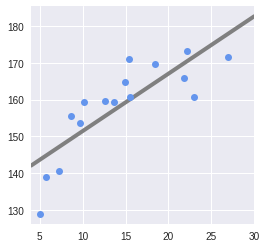

In [14]:
# リスト５−１−(11)

# 解析解

def fit_line(x, t):
    mx = np.mean(x)
    mt = np.mean(t)
    mtx = np.mean(t*x)
    mxx = np.mean(x*x)
    w0 = (mtx - mt*mx)/(mxx - mx**2)
    w1 = mt - w0*mx
    return np.array([w0, w1])

# メインーーーーーーーー
w = fit_line(X, T)
print("w0={0:.3f}, w1={1:.3f}" .format(w[0],w[1]))
mse = mse_line(X, T, W)
print("SD={0:.3f}cm" .format(np.sqrt(mse)))
plt.figure(figsize=(4,4))
show_line(w)
plt.plot(X, T, marker='o', linestyle='None',
        color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()